In [79]:
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import missingno as msno
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [58]:
import warnings

warnings.filterwarnings('ignore')

In [59]:
penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

In [78]:
def print_stats(model, accuracy, precision, recall):
    print(f'Model: {model}')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')

In [60]:
penguins_df = palmerpenguins.load_penguins()
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [61]:
penguins_df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [62]:
penguins_df.shape

(344, 8)

## We visualize the data

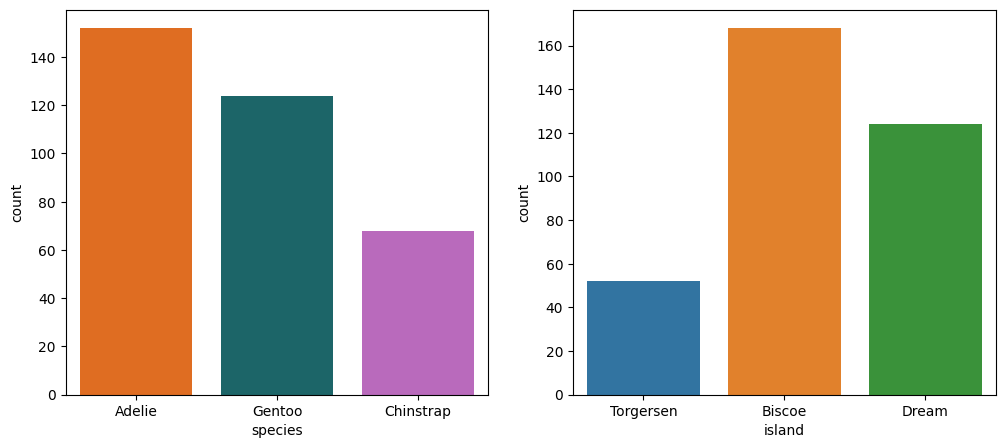

In [63]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(
    data=penguins_df,
    x="species",
    hue="species",
    palette=penguin_color,
    ax=axs[0]
)

sns.countplot(
    data=penguins_df,
    x="island",
    hue="island",
    ax=axs[1]
)
plt.show()

# What is the most appropriate model to try to predict the species of penguins?

### Check for missing values

In [64]:
penguins_df.isna().sum().sum()
#We calculate how many missing values there are

19

<Axes: >

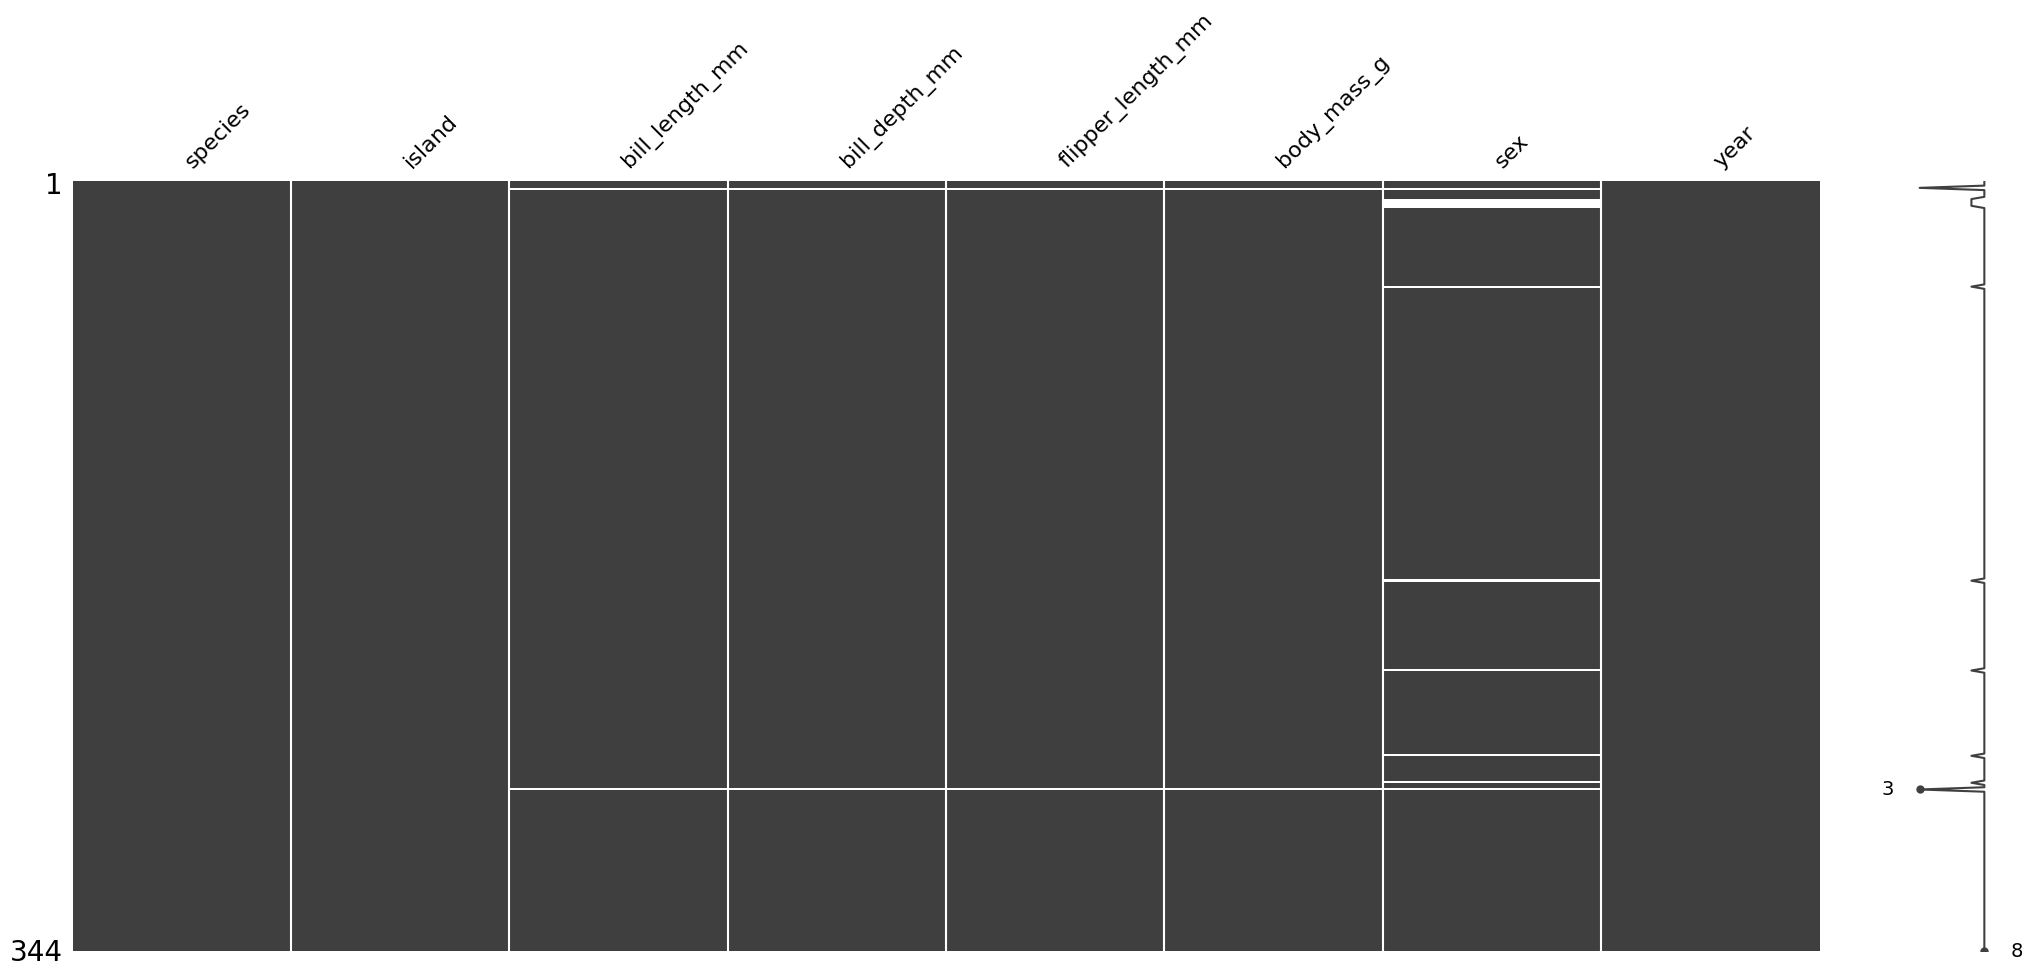

In [65]:
msno.matrix(penguins_df)
# We can see that very few penguins enter the missing data.

In [66]:
penguins_df = penguins_df.dropna()
penguins_df.shape
#we delete those rows
#before: (344, 8)

(333, 8)

<Axes: >

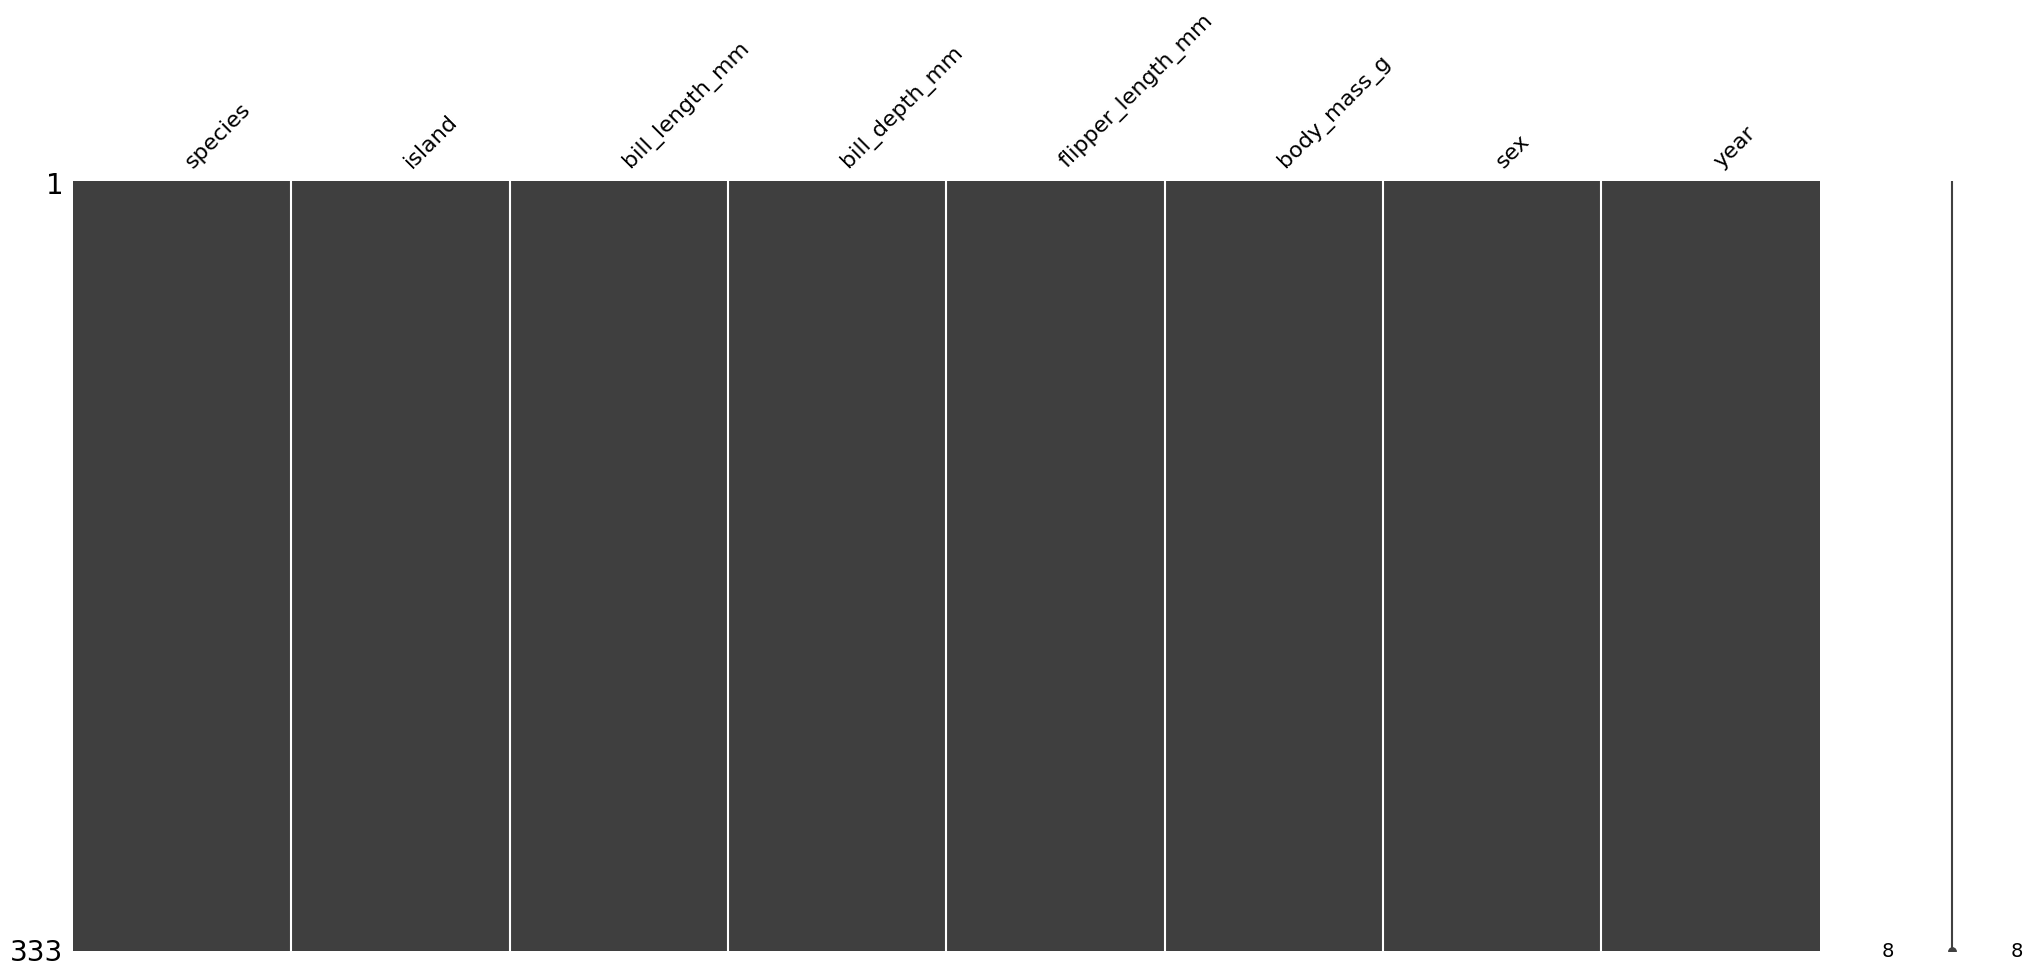

In [67]:
msno.matrix(penguins_df)

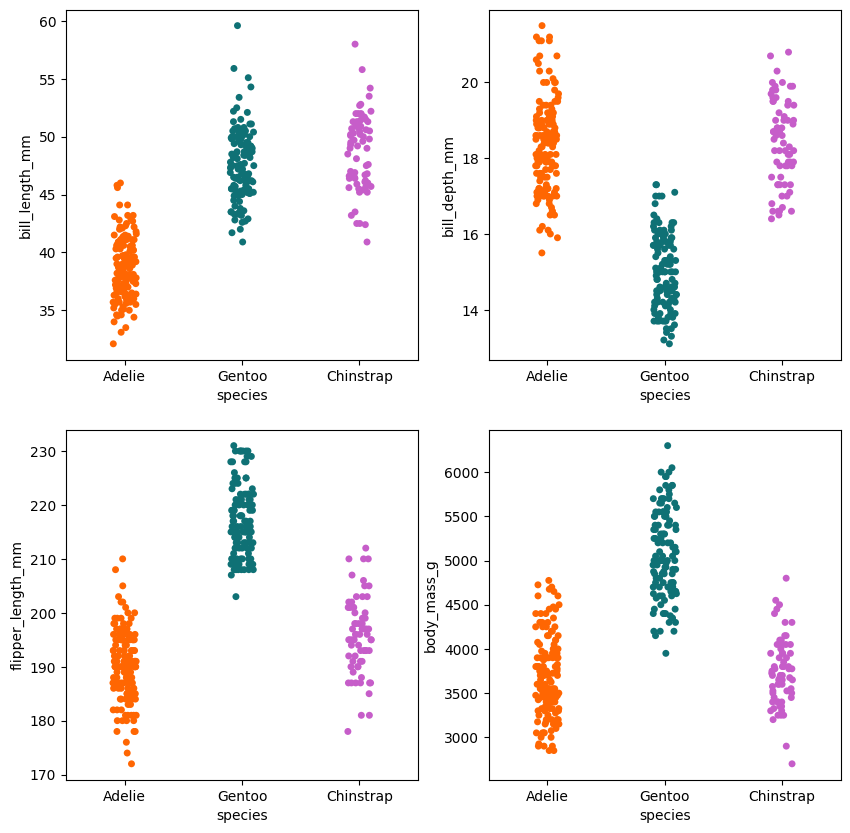

In [68]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
sns.stripplot(
    data=penguins_df,
    y='bill_length_mm',
    x='species',
    hue='species',
    palette=penguin_color,
    ax=axs[0,0]
)
sns.stripplot(
    data=penguins_df,
    y='bill_depth_mm',
    x='species',
    hue='species',
    palette=penguin_color,
    ax=axs[0,1]
)
sns.stripplot(
    data=penguins_df,
    y='flipper_length_mm',
    x='species',
    hue='species',
    palette=penguin_color,
    ax=axs[1,0]
)
sns.stripplot(
    data=penguins_df,
    y='body_mass_g',
    x='species',
    hue='species',
    palette=penguin_color,
    ax=axs[1,1]
)
plt.show()
#bill_length_mm	bill_depth_mm	flipper_length_mm	body_mass_g

In [69]:
penguins_df_transform = pd.get_dummies(penguins_df, columns=['island'], prefix='island')
penguins_df_transform

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,male,2007,False,False,True
1,Adelie,39.5,17.4,186.0,3800.0,female,2007,False,False,True
2,Adelie,40.3,18.0,195.0,3250.0,female,2007,False,False,True
4,Adelie,36.7,19.3,193.0,3450.0,female,2007,False,False,True
5,Adelie,39.3,20.6,190.0,3650.0,male,2007,False,False,True
...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,55.8,19.8,207.0,4000.0,male,2009,False,True,False
340,Chinstrap,43.5,18.1,202.0,3400.0,female,2009,False,True,False
341,Chinstrap,49.6,18.2,193.0,3775.0,male,2009,False,True,False
342,Chinstrap,50.8,19.0,210.0,4100.0,male,2009,False,True,False


In [70]:
Y = penguins_df_transform['species']
X = penguins_df_transform.drop(['species','sex','year'], axis=1)
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,False,False,True
1,39.5,17.4,186.0,3800.0,False,False,True
2,40.3,18.0,195.0,3250.0,False,False,True
4,36.7,19.3,193.0,3450.0,False,False,True
5,39.3,20.6,190.0,3650.0,False,False,True
...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,False,True,False
340,43.5,18.1,202.0,3400.0,False,True,False
341,49.6,18.2,193.0,3775.0,False,True,False
342,50.8,19.0,210.0,4100.0,False,True,False


# Regresion Logistica

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#I divide the set into training and testing data: I train the model: I make the prediction

In [89]:
from sklearn.metrics import balanced_accuracy_score

gini_coefficient = 1 - balanced_accuracy_score(y_test.values, y_pred)
gini_coefficient
# I calculate the gini coefficient to know if the classes are unbalanced: it is close to 0, they are balanced

0.010752688172043001

In [94]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='macro')
recall = metrics.recall_score(y_test, y_pred, average='macro')

print_stats('Logistic', accuracy, precision, recall)

Model: Logistic
Accuracy: 0.9850746268656716
Precision: 0.9824561403508771
Recall: 0.989247311827957


In [107]:
vars = zip(X.columns.to_numpy(), model.coef_[0])

In [108]:
list(vars)

[('bill_length_mm', -0.8842925403219056),
 ('bill_depth_mm', 0.7833179321918421),
 ('flipper_length_mm', 0.11343273398482902),
 ('body_mass_g', 0.001034080996978595),
 ('island_Biscoe', -0.029256737583810276),
 ('island_Dream', -0.026077632087983),
 ('island_Torgersen', 0.07293816140736013)]

### I can see that island_Biscoe, island_Dream, island_Togersen, body_mass_g, flipper_length_mm are numbers close to zero so I am going to proceed to eliminate them from my set of 'X' and reapply the model

### 2nd iteration

In [112]:
Y2 = penguins_df_transform['species']
X2 = penguins_df_transform.drop(['species','sex','year', 'island_Torgersen', 'island_Dream', 'island_Biscoe', 'body_mass_g', 'flipper_length_mm'], axis=1)
X2

,bill_length_mm,bill_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
4,36.7,19.3
5,39.3,20.6
...,...,...
339,55.8,19.8
340,43.5,18.1
341,49.6,18.2
342,50.8,19.0


In [116]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.2, random_state=42)

model2 = LogisticRegression()
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)

In [117]:
accuracy2 = metrics.accuracy_score(y_test2, y_pred2)
precision2 = metrics.precision_score(y_test2, y_pred2, average='macro')
recall2 = metrics.recall_score(y_test2, y_pred2, average='macro')

print_stats('Logistic 2da iteracion', accuracy2, precision2, recall2)

Model: Logistic 2da iteracion
Accuracy: 0.9402985074626866
Precision: 0.9329384531590413
Recall: 0.9259259259259259


# KNN

In [125]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for k in range(1, 40):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy {accuracy} for KNN model with {k} Neighbor')


Accuracy 0.7761194029850746 for KNN model with 1 Neighbor
Accuracy 0.7164179104477612 for KNN model with 2 Neighbor
Accuracy 0.7611940298507462 for KNN model with 3 Neighbor
Accuracy 0.7014925373134329 for KNN model with 4 Neighbor
Accuracy 0.746268656716418 for KNN model with 5 Neighbor
Accuracy 0.746268656716418 for KNN model with 6 Neighbor
Accuracy 0.746268656716418 for KNN model with 7 Neighbor
Accuracy 0.7014925373134329 for KNN model with 8 Neighbor
Accuracy 0.6865671641791045 for KNN model with 9 Neighbor
Accuracy 0.7014925373134329 for KNN model with 10 Neighbor
Accuracy 0.6865671641791045 for KNN model with 11 Neighbor
Accuracy 0.6716417910447762 for KNN model with 12 Neighbor
Accuracy 0.7014925373134329 for KNN model with 13 Neighbor
Accuracy 0.7164179104477612 for KNN model with 14 Neighbor
Accuracy 0.7313432835820896 for KNN model with 15 Neighbor
Accuracy 0.7014925373134329 for KNN model with 16 Neighbor
Accuracy 0.7611940298507462 for KNN model with 17 Neighbor
Accuracy 

# Decision trees

In [128]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)
y_pred = tree_classifier.predict(X_test)
accuracy_score(y_test, y_pred)


1.0